In [38]:
import pandas as pd
import numpy as np
from collections import Counter

from imblearn.under_sampling import TomekLinks
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, roc_auc_score

import xgboost as xgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from tensorflow.python.keras.callbacks import EarlyStopping




In [2]:
data = pd.read_csv('DataWithOrgFeatures.csv')


Data preprocessing


In [3]:
df1 = data[data.dataset == 'train'].reset_index(drop=True)
data.head()

,Unnamed: 0,FarmID,category,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,...,Season,geometry,dataset,tif_path,ndvi,evi,ndwi,gndvi,savi,msavi
0,0,1326576,Healthy,Paddy,Telangana,Medak,Kulcharam,25-11-2023,14-04-2024,97,...,Rabi,POLYGON ((78.18079255482755 17.978971746424413...,train,downloads/20240412T050649_20240412T051727_T43Q...,0.100756,-0.793684,8.488031,0.127153,0.151125,4232.596191
1,1,1326577,Healthy,Paddy,Telangana,Medak,Kulcharam,13-11-2023,26-04-2024,82,...,Rabi,POLYGON ((78.17483419891283 17.981508840879556...,train,downloads/20240425T051649_20240425T052817_T43Q...,0.188090,0.564248,11.493762,0.187815,0.282110,3249.392822
2,2,1326578,Healthy,Paddy,Telangana,Medak,Kulcharam,19-12-2023,28-04-2024,92,...,Rabi,POLYGON ((78.16888476438905 17.976727511659835...,train,downloads/20240427T050651_20240427T051439_T43Q...,0.206596,-1.456745,10.166884,0.206553,0.309869,3741.956055
3,3,1331836,Diseased,Paddy,Telangana,Medak,Kulcharam,11-02-2023,04-11-2024,91,...,Rabi,POLYGON ((78.16821795882959 17.974690113471414...,train,downloads/20241103T050951_20241103T052004_T43Q...,0.206250,2.206184,10.446196,0.220995,0.309350,3673.396729
4,4,1326579,Diseased,Paddy,Telangana,Medak,Kulcharam,12-12-2023,19-05-2024,94,...,Rabi,POLYGON ((78.17244459940454 17.969620948965225...,train,downloads/20240517T050651_20240517T051655_T43Q...,0.179721,-0.743638,8.665929,0.160657,0.269563,4227.338379


In [4]:
df1.describe()

,Unnamed: 0,FarmID,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield,ndvi,evi,ndwi,gndvi,savi,msavi
count,8775.00000,8.775000e+03,8775.000000,8775.000000,8775.000000,8775.000000,8775.000000,7867.000000,7.876000e+03,7867.000000,7867.000000,7876.000000,7876.000000
mean,4387.00000,1.252339e+06,76.553504,87.707806,3.550541,57.150199,15.541197,0.690493,1.124705e+10,10.216932,0.294229,1.024979,3841.299388
std,2533.26864,2.447332e+05,15.002601,49.307300,1.391602,22.330291,5.933997,1.678579,1.476962e+11,2.767614,0.895393,2.503640,1507.451726
min,0.00000,2.780000e+02,40.000000,20.000000,1.000000,20.000000,5.000000,0.004725,-1.479292e+03,0.006600,0.003807,0.000000,0.000000
25%,2193.50000,1.314020e+06,65.000000,57.000000,2.000000,42.000000,11.000000,0.122109,-9.660190e-01,9.439487,0.101876,0.180498,3045.559509
50%,4387.00000,1.324434e+06,78.000000,76.000000,4.000000,51.000000,15.000000,0.182362,6.954238e-01,10.915969,0.168352,0.271773,3454.632080
75%,6580.50000,1.329228e+06,89.000000,100.000000,5.000000,82.000000,20.000000,0.260429,2.986414e+00,11.946729,0.215641,0.388238,3963.637573
max,8774.00000,1.332157e+06,100.000000,250.000000,6.000000,100.000000,30.000000,18.339667,4.403293e+12,16.823843,15.784201,27.505635,12733.712891


In [5]:
df1.isnull().sum()

Unnamed: 0           0
FarmID               0
category             0
Crop                 0
State                0
District             0
Sub-District         0
SDate                0
HDate                0
CropCoveredArea      0
CHeight              0
CNext                0
CLast                0
CTransp              0
IrriType             0
IrriSource           0
IrriCount            0
WaterCov             0
ExpYield             0
Season               0
geometry             0
dataset              0
tif_path           895
ndvi               908
evi                899
ndwi               908
gndvi              908
savi               899
msavi              899
dtype: int64

In [6]:
df1 = df1[df1.isnull().sum(axis = 1) < 6]
df1.isnull().sum()


Unnamed: 0         0
FarmID             0
category           0
Crop               0
State              0
District           0
Sub-District       0
SDate              0
HDate              0
CropCoveredArea    0
CHeight            0
CNext              0
CLast              0
CTransp            0
IrriType           0
IrriSource         0
IrriCount          0
WaterCov           0
ExpYield           0
Season             0
geometry           0
dataset            0
tif_path           0
ndvi               9
evi                0
ndwi               9
gndvi              9
savi               0
msavi              0
dtype: int64

In [7]:
to_drop = ['FarmID','tif_path','dataset','geometry','Unnamed: 0','State']
df1.drop(to_drop, axis=1, inplace=True)

In [8]:
df1.dropna(inplace=True)

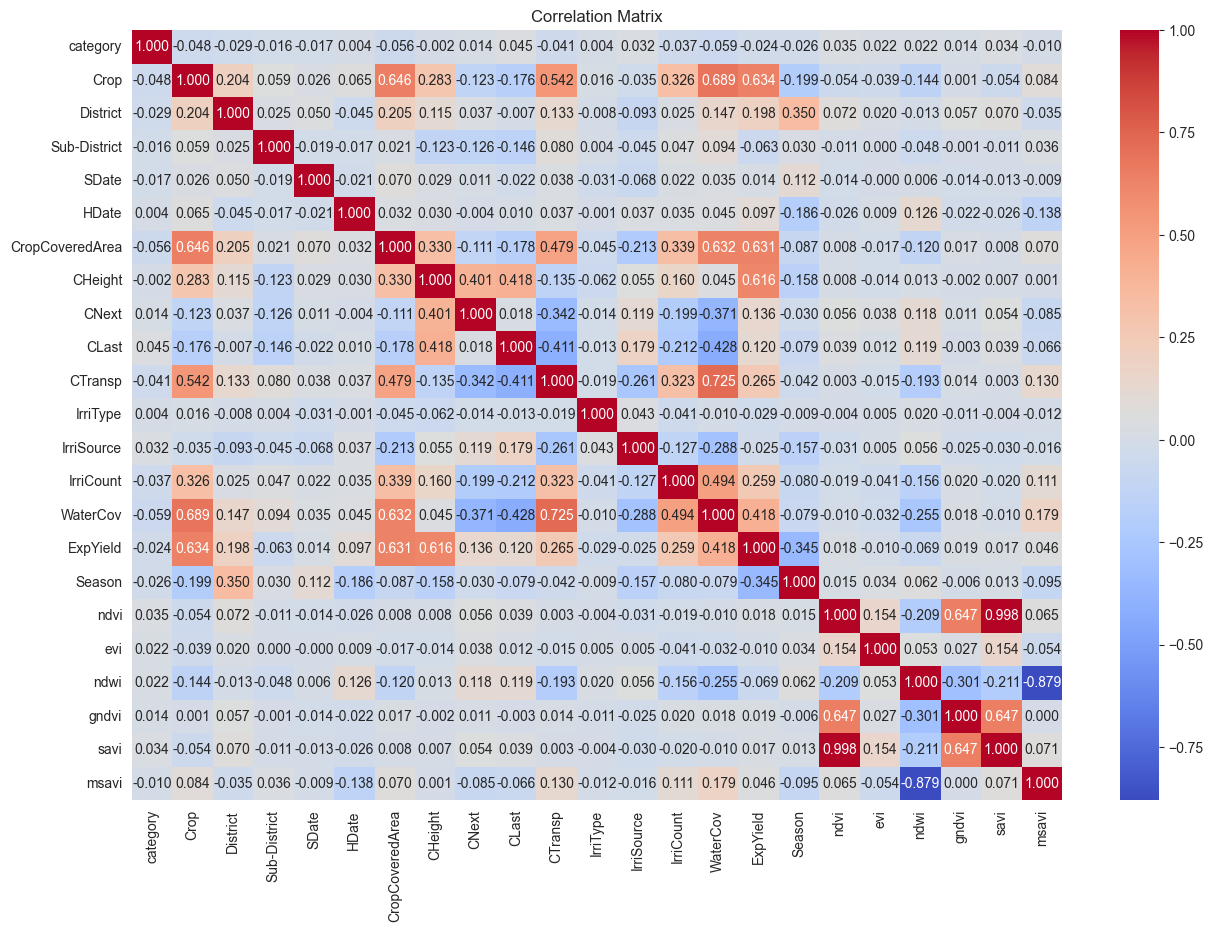

In [9]:
# Copy the original DataFrame
a = df1.copy()

# Select categorical columns
cat_col = a.select_dtypes(include='object')


# Apply Label Encoding to each categorical column
encoder = LabelEncoder()
for col in cat_col.columns:
    a[col] = encoder.fit_transform(a[col])
    

# Compute the correlation matrix for numerical columns
correlation_matrix = a.corr()

# Plot the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [10]:
df1.head(5)

,category,Crop,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,...,IrriCount,WaterCov,ExpYield,Season,ndvi,evi,ndwi,gndvi,savi,msavi
0,Healthy,Paddy,Medak,Kulcharam,25-11-2023,14-04-2024,97,54,Pea,Lentil,...,4,87,17,Rabi,0.100756,-0.793684,8.488031,0.127153,0.151125,4232.596191
1,Healthy,Paddy,Medak,Kulcharam,13-11-2023,26-04-2024,82,58,Pea,Lentil,...,5,94,15,Rabi,0.188090,0.564248,11.493762,0.187815,0.282110,3249.392822
2,Healthy,Paddy,Medak,Kulcharam,19-12-2023,28-04-2024,92,91,Pea,Lentil,...,3,99,20,Rabi,0.206596,-1.456745,10.166884,0.206553,0.309869,3741.956055
3,Diseased,Paddy,Medak,Kulcharam,11-02-2023,04-11-2024,91,52,Pea,Lentil,...,5,92,16,Rabi,0.206250,2.206184,10.446196,0.220995,0.309350,3673.396729
4,Diseased,Paddy,Medak,Kulcharam,12-12-2023,19-05-2024,94,55,Pea,Lentil,...,5,97,20,Rabi,0.179721,-0.743638,8.665929,0.160657,0.269563,4227.338379


<Axes: xlabel='Crop', ylabel='count'>

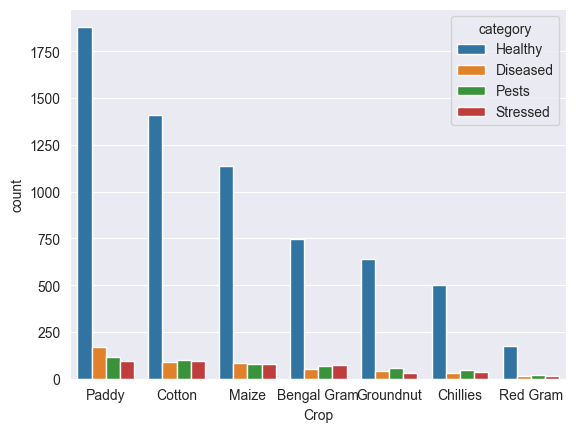

In [15]:
sns.countplot(x='Crop', hue = 'category', data=df1)


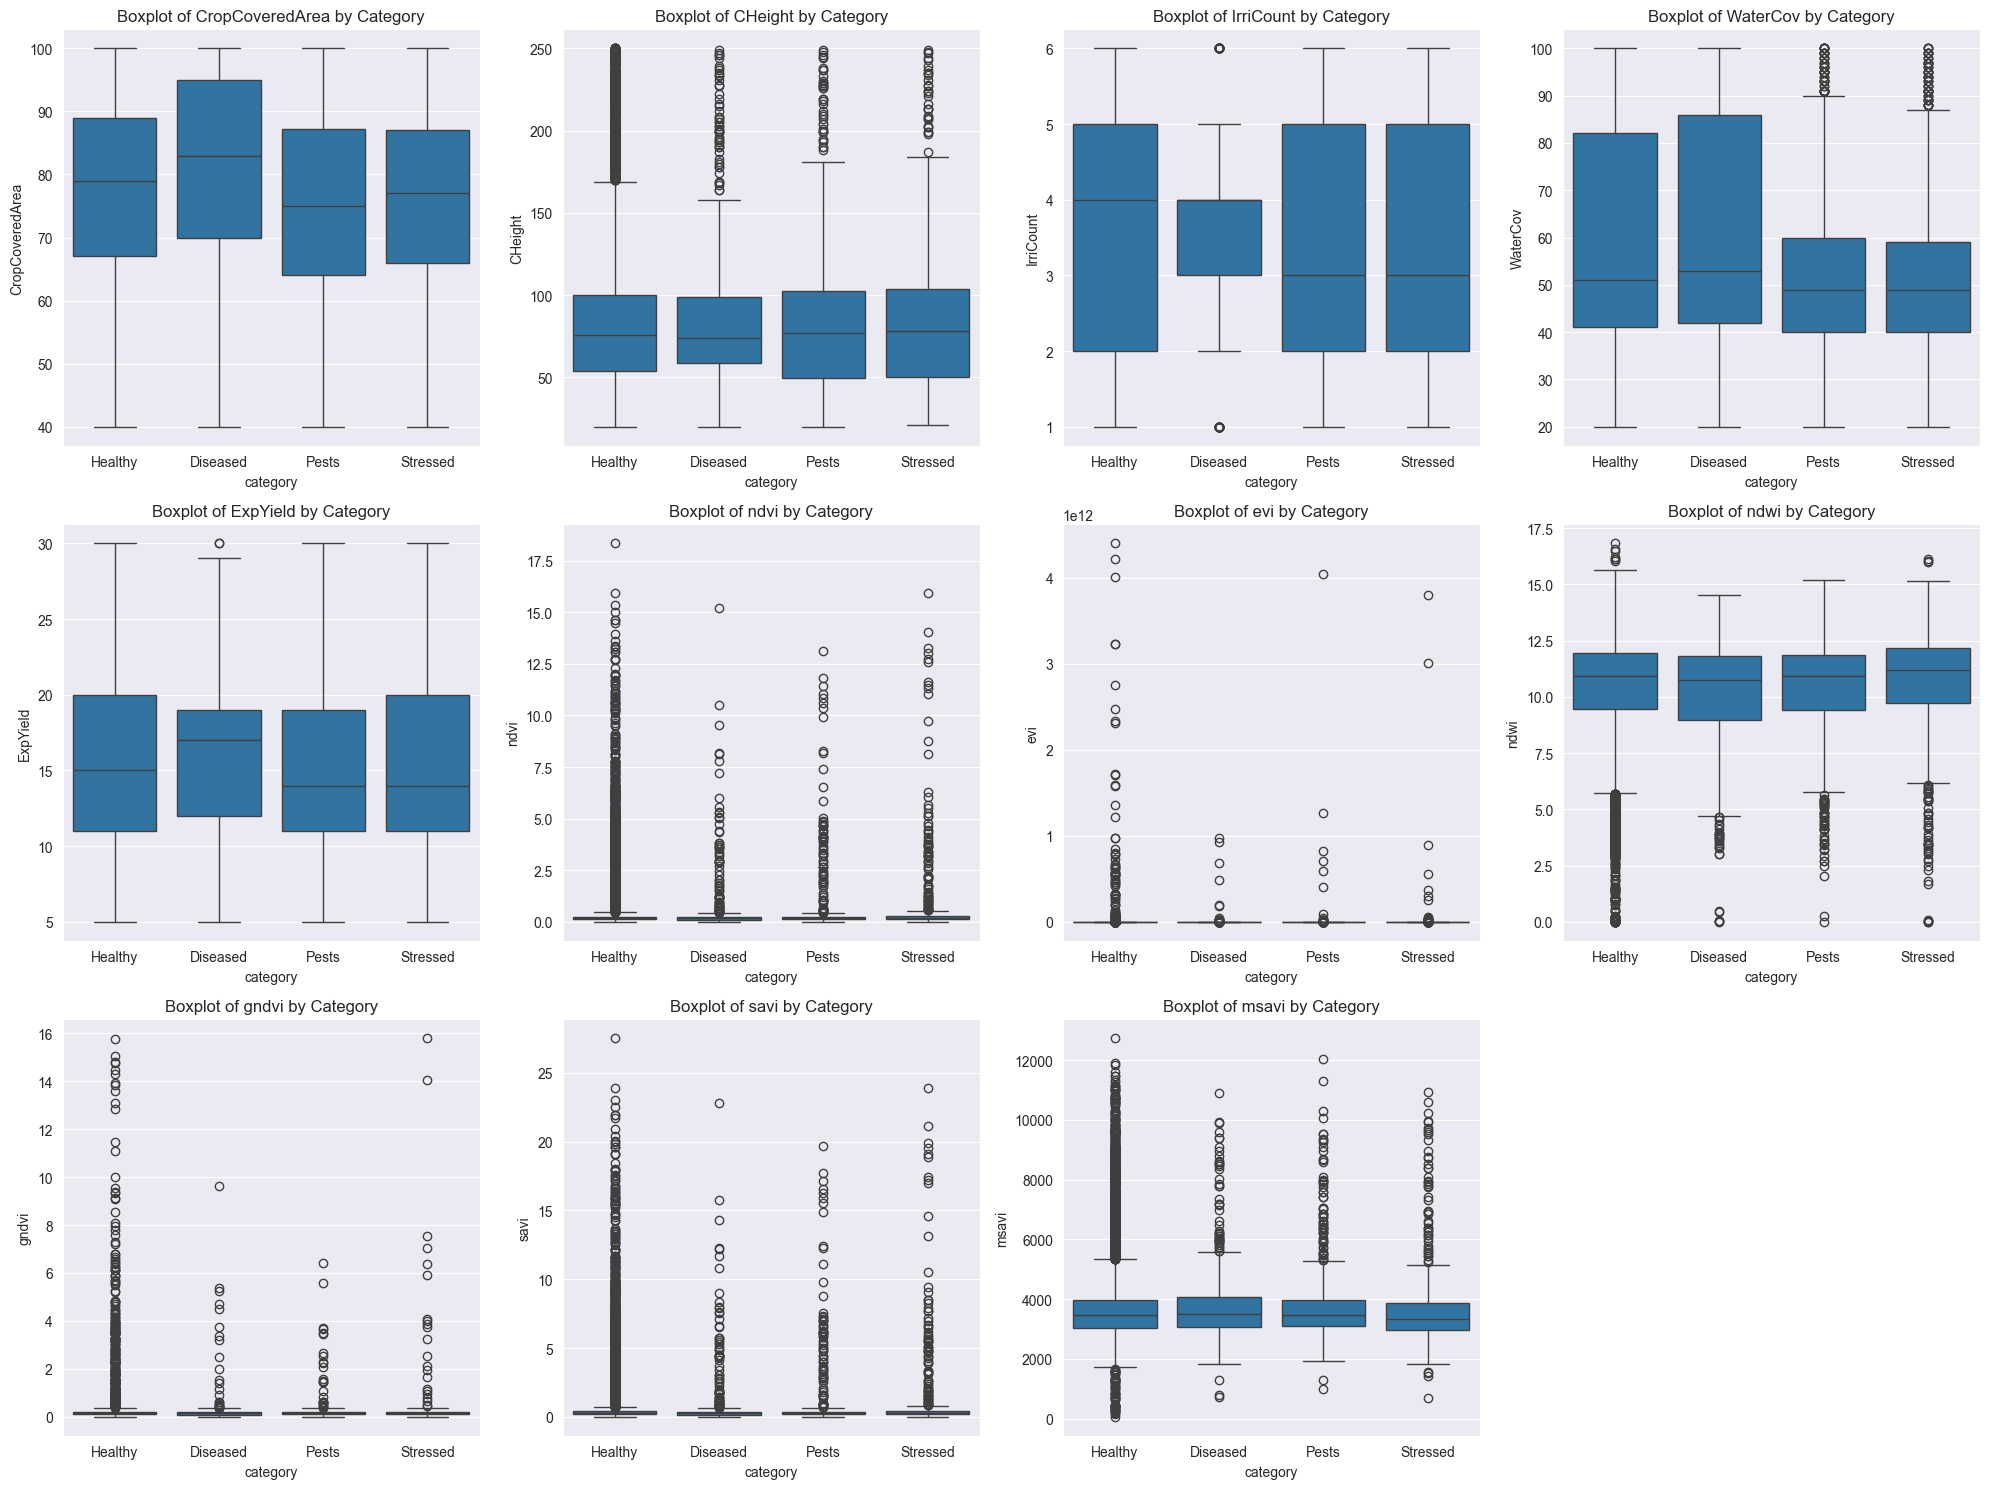

In [16]:
# Get the list of numerical columns in the dataset
numerical_cols = df1.select_dtypes(include='number').columns.tolist()

# Define number of rows and columns in the grid (adjust based on the number of features)
n_cols = 4  # Number of columns in the grid
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate rows needed

# Create the figure and axes for subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Adjust figsize as necessary
axes = axes.flatten()  # Flatten axes to easily iterate through them

# Plot boxplots for all numerical features by category
for idx, col in enumerate(numerical_cols):
    ax = axes[idx]  # Get the current axis to plot on
    sns.boxplot(x='category', y=col, data=df1, ax=ax)
    ax.set_title(f'Boxplot of {col} by Category')

# Hide any unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [17]:
df1

,category,Crop,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,...,IrriCount,WaterCov,ExpYield,Season,ndvi,evi,ndwi,gndvi,savi,msavi
0,Healthy,Paddy,Medak,Kulcharam,25-11-2023,14-04-2024,97,54,Pea,Lentil,...,4,87,17,Rabi,0.100756,-0.793684,8.488031,0.127153,0.151125,4232.596191
1,Healthy,Paddy,Medak,Kulcharam,13-11-2023,26-04-2024,82,58,Pea,Lentil,...,5,94,15,Rabi,0.188090,0.564248,11.493762,0.187815,0.282110,3249.392822
2,Healthy,Paddy,Medak,Kulcharam,19-12-2023,28-04-2024,92,91,Pea,Lentil,...,3,99,20,Rabi,0.206596,-1.456745,10.166884,0.206553,0.309869,3741.956055
3,Diseased,Paddy,Medak,Kulcharam,11-02-2023,04-11-2024,91,52,Pea,Lentil,...,5,92,16,Rabi,0.206250,2.206184,10.446196,0.220995,0.309350,3673.396729
4,Diseased,Paddy,Medak,Kulcharam,12-12-2023,19-05-2024,94,55,Pea,Lentil,...,5,97,20,Rabi,0.179721,-0.743638,8.665929,0.160657,0.269563,4227.338379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8770,Healthy,Cotton,Adilabad,Bela,05-01-2023,30-09-2023,78,81,Sorghum,Maize,...,2,60,18,Kharif,3.102766,-2.293556,3.192862,0.014609,4.654037,10281.091797
8771,Healthy,Cotton,Adilabad,Bela,24-05-2023,11-09-2023,81,110,Maize,Maize,...,3,45,11,Kharif,3.785439,-41.483080,3.887022,0.013866,5.677993,8434.980469
8772,Healthy,Cotton,Adilabad,Bela,06-06-2023,30-12-2023,68,66,Sorghum,Sorghum,...,3,58,14,Kharif,0.059614,0.594396,10.215782,0.099442,0.089414,3416.056152
8773,Healthy,Cotton,Adilabad,Bela,15-05-2023,20-09-2023,84,101,Sorghum,Sorghum,...,3,52,20,Kharif,3.309893,-2.324946,3.380356,0.008298,4.964714,9639.482422


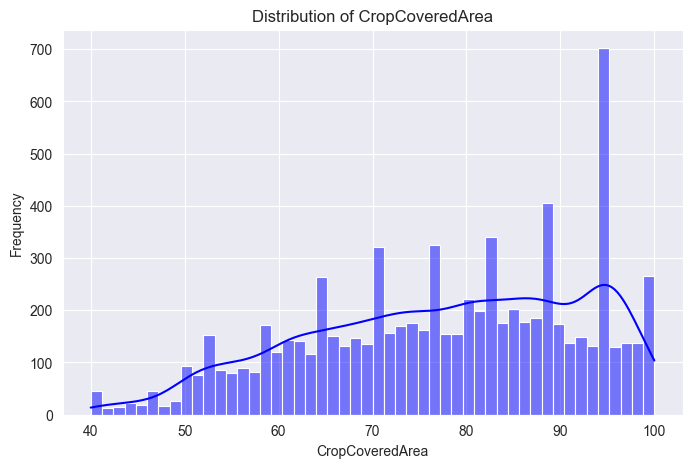

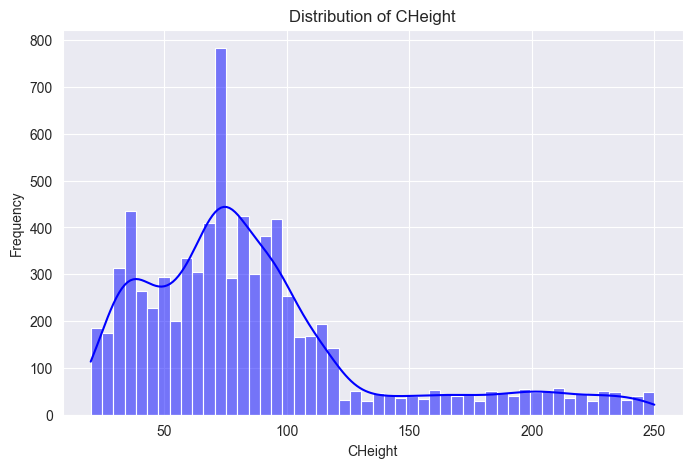

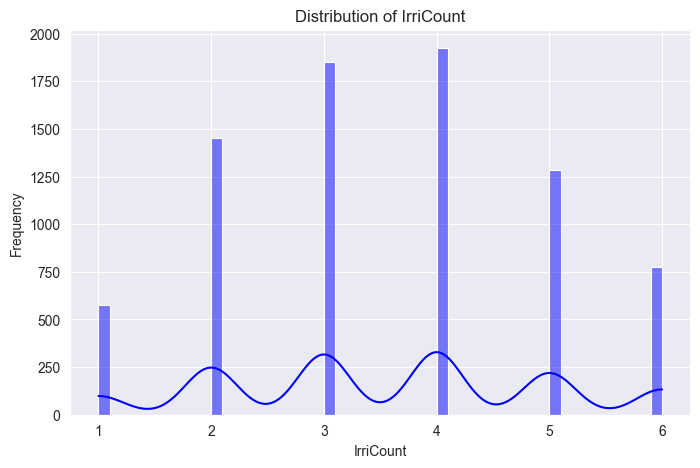

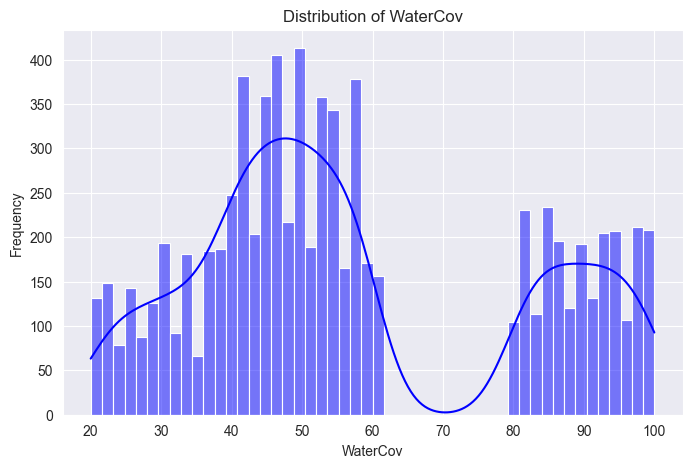

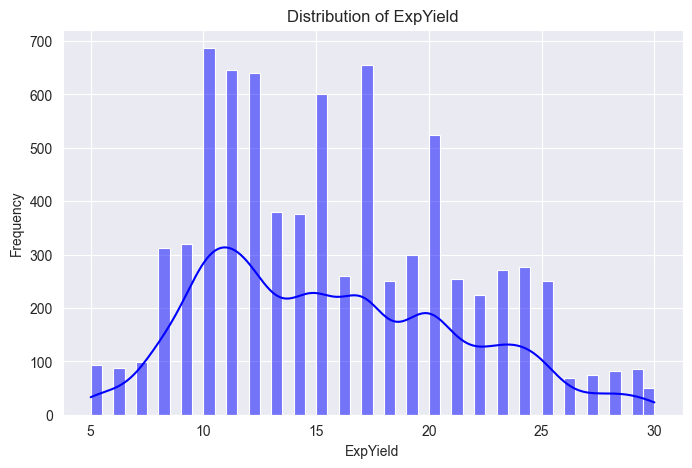

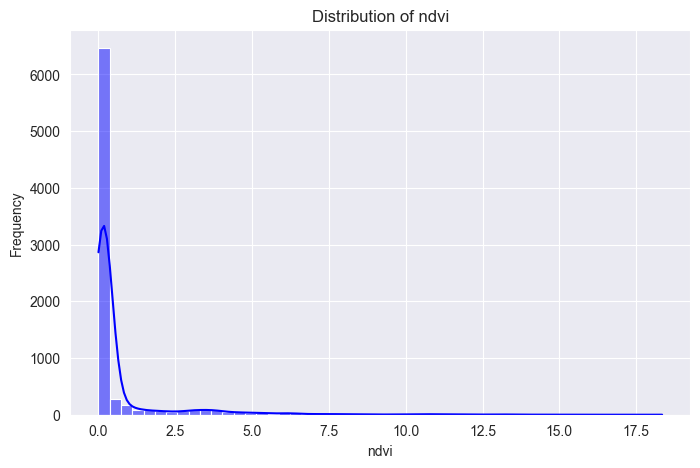

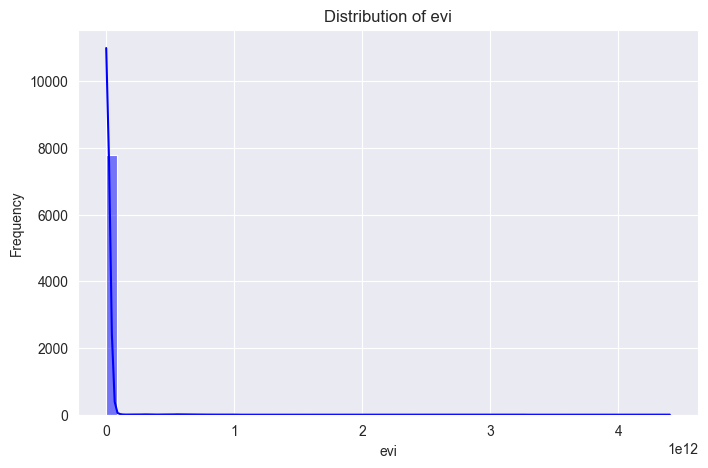

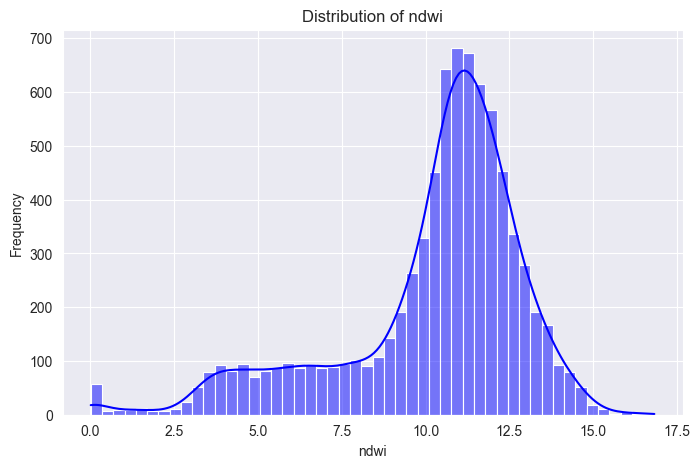

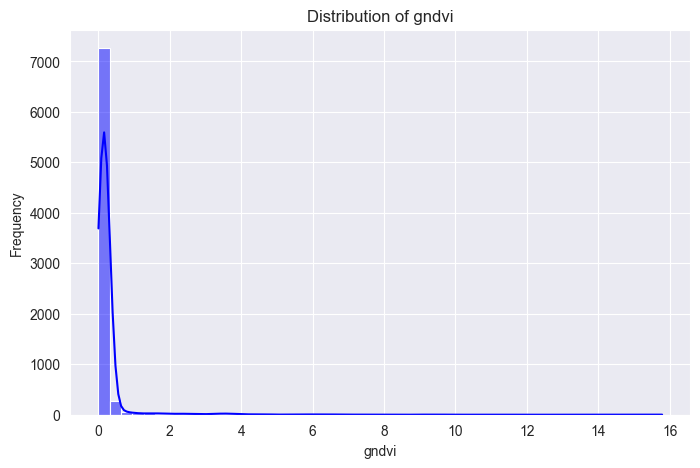

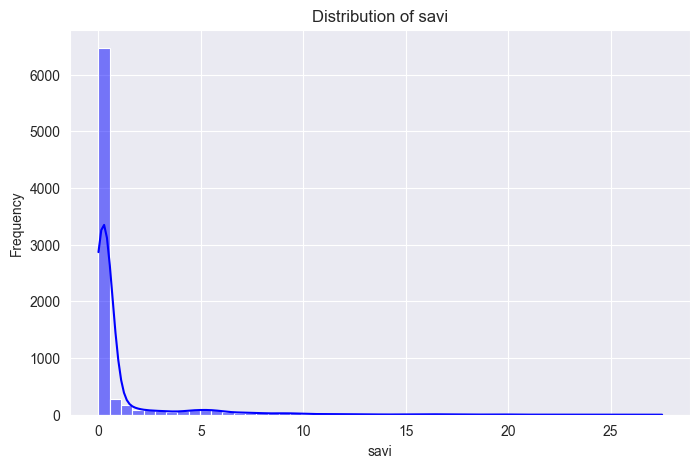

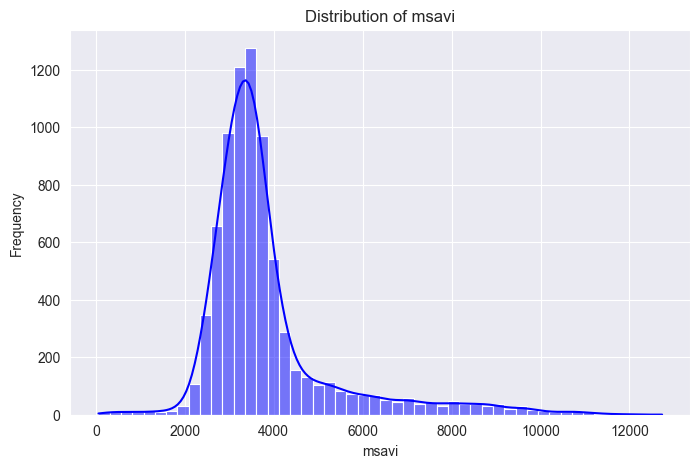

In [18]:
numerical_columns = df1.select_dtypes(include=['number']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))  

    sns.histplot(data=df1, x=col, kde=True, color='blue', bins=50)

    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [19]:
# add more feature
df1['SDate'] = pd.to_datetime(df1['SDate'])
df1['HDate'] = pd.to_datetime(df1['HDate'])

df1['Smonth'] = df1['SDate'].dt.month
df1['Hmonth'] = df1['HDate'].dt.month

df1['Squarter'] = df1['SDate'].dt.quarter
df1['Hquarter'] = df1['HDate'].dt.quarter

df1["dateDiff"] = (df1['HDate'] - df1['SDate']).dt.days

df1.drop(['SDate','HDate'],inplace=True,axis=1)

C:\Users\khale\AppData\Local\Temp\ipykernel_24308\1949576515.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['SDate'] = pd.to_datetime(df1['SDate'])
C:\Users\khale\AppData\Local\Temp\ipykernel_24308\1949576515.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['HDate'] = pd.to_datetime(df1['HDate'])


In [20]:
df1.describe()

,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield,ndvi,evi,ndwi,gndvi,savi,msavi,Smonth,Hmonth,Squarter,Hquarter,dateDiff
count,7867.000000,7867.000000,7867.000000,7867.000000,7867.000000,7867.000000,7.867000e+03,7867.000000,7867.000000,7867.000000,7867.000000,7867.000000,7867.000000,7867.000000,7867.000000,7867.000000
mean,77.414898,87.444007,3.537181,57.146434,15.688318,0.690493,1.125991e+10,10.216932,0.294229,1.026152,3845.693909,8.439939,5.619042,3.140079,2.236685,193.419855
std,14.473811,50.328650,1.405732,22.866706,5.639904,1.678579,1.477802e+11,2.767614,0.895393,2.504832,1502.700432,3.300571,3.555797,1.084272,1.179174,124.343436
min,40.000000,20.000000,1.000000,20.000000,5.000000,0.004725,-1.479292e+03,0.006600,0.003807,0.003118,59.103088,1.000000,1.000000,1.000000,1.000000,2.000000
25%,66.000000,54.000000,2.000000,41.000000,11.000000,0.122109,-9.661173e-01,9.439487,0.101876,0.180840,3046.361328,6.000000,3.000000,2.000000,1.000000,108.000000
50%,79.000000,76.000000,4.000000,51.000000,15.000000,0.182362,7.032840e-01,10.915969,0.168352,0.272085,3455.920166,10.000000,4.000000,4.000000,2.000000,153.000000
75%,89.000000,100.000000,5.000000,82.000000,20.000000,0.260429,2.993895e+00,11.946729,0.215641,0.388692,3963.951538,11.000000,9.000000,4.000000,3.000000,258.500000
max,100.000000,250.000000,6.000000,100.000000,30.000000,18.339667,4.403293e+12,16.823843,15.784201,27.505635,12733.712891,12.000000,12.000000,4.000000,4.000000,693.000000


In [21]:
#scale data
numerical_columns = df1.select_dtypes(include=['number']).columns
date_col = ['Sday', 'Smonth', 'Syear', 'Hday', 'Hmonth', 'Hyear', 'dateDiff']
columns_to_scale = [col for col in numerical_columns if col not in date_col]

scaler = StandardScaler()

for col in columns_to_scale:
    df1[col] = scaler.fit_transform(df1[[col]])


In [22]:
df1.describe()

,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield,ndvi,evi,ndwi,gndvi,savi,msavi,Smonth,Hmonth,Squarter,Hquarter,dateDiff
count,7.867000e+03,7.867000e+03,7.867000e+03,7.867000e+03,7.867000e+03,7.867000e+03,7.867000e+03,7.867000e+03,7.867000e+03,7.867000e+03,7.867000e+03,7867.000000,7867.000000,7.867000e+03,7.867000e+03,7867.000000
mean,-1.878644e-16,-2.890221e-17,1.156088e-16,-8.670663e-17,1.589621e-16,-5.780442e-17,-7.225552e-18,5.563675e-16,1.987027e-17,5.780442e-17,4.335331e-17,8.439939,5.619042,2.023155e-16,-1.734133e-16,193.419855
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,3.300571,3.555797,1.000064e+00,1.000064e+00,124.343436
min,-2.585171e+00,-1.340157e+00,-1.804996e+00,-1.624580e+00,-1.895245e+00,-4.085668e-01,-7.619851e-02,-3.689453e+00,-3.243716e-01,-4.084501e-01,-2.520018e+00,1.000000,1.000000,-1.973872e+00,-1.048839e+00,2.000000
25%,-7.887089e-01,-6.645545e-01,-1.093578e+00,-7.061560e-01,-8.313292e-01,-3.386317e-01,-7.619850e-02,-2.809258e-01,-2.148387e-01,-3.374939e-01,-5.319646e-01,6.000000,3.000000,-1.051536e+00,-1.048839e+00,108.000000
50%,1.095222e-01,-2.274000e-01,3.292581e-01,-2.688111e-01,-1.220521e-01,-3.027344e-01,-7.619850e-02,2.525934e-01,-1.405920e-01,-3.010641e-01,-2.593987e-01,10.000000,4.000000,7.931365e-01,-2.007337e-01,153.000000
75%,8.004691e-01,2.494959e-01,1.040676e+00,1.086958e+00,7.645442e-01,-2.562233e-01,-7.619850e-02,6.250535e-01,-8.777527e-02,-2.545082e-01,7.870174e-02,11.000000,9.000000,7.931365e-01,6.473714e-01,258.500000
max,1.560511e+00,3.230095e+00,1.752094e+00,1.874179e+00,2.537737e+00,1.051502e+01,2.972193e+01,2.387374e+00,1.730073e+01,1.057203e+01,5.915074e+00,12.000000,12.000000,7.931365e-01,1.495476e+00,693.000000


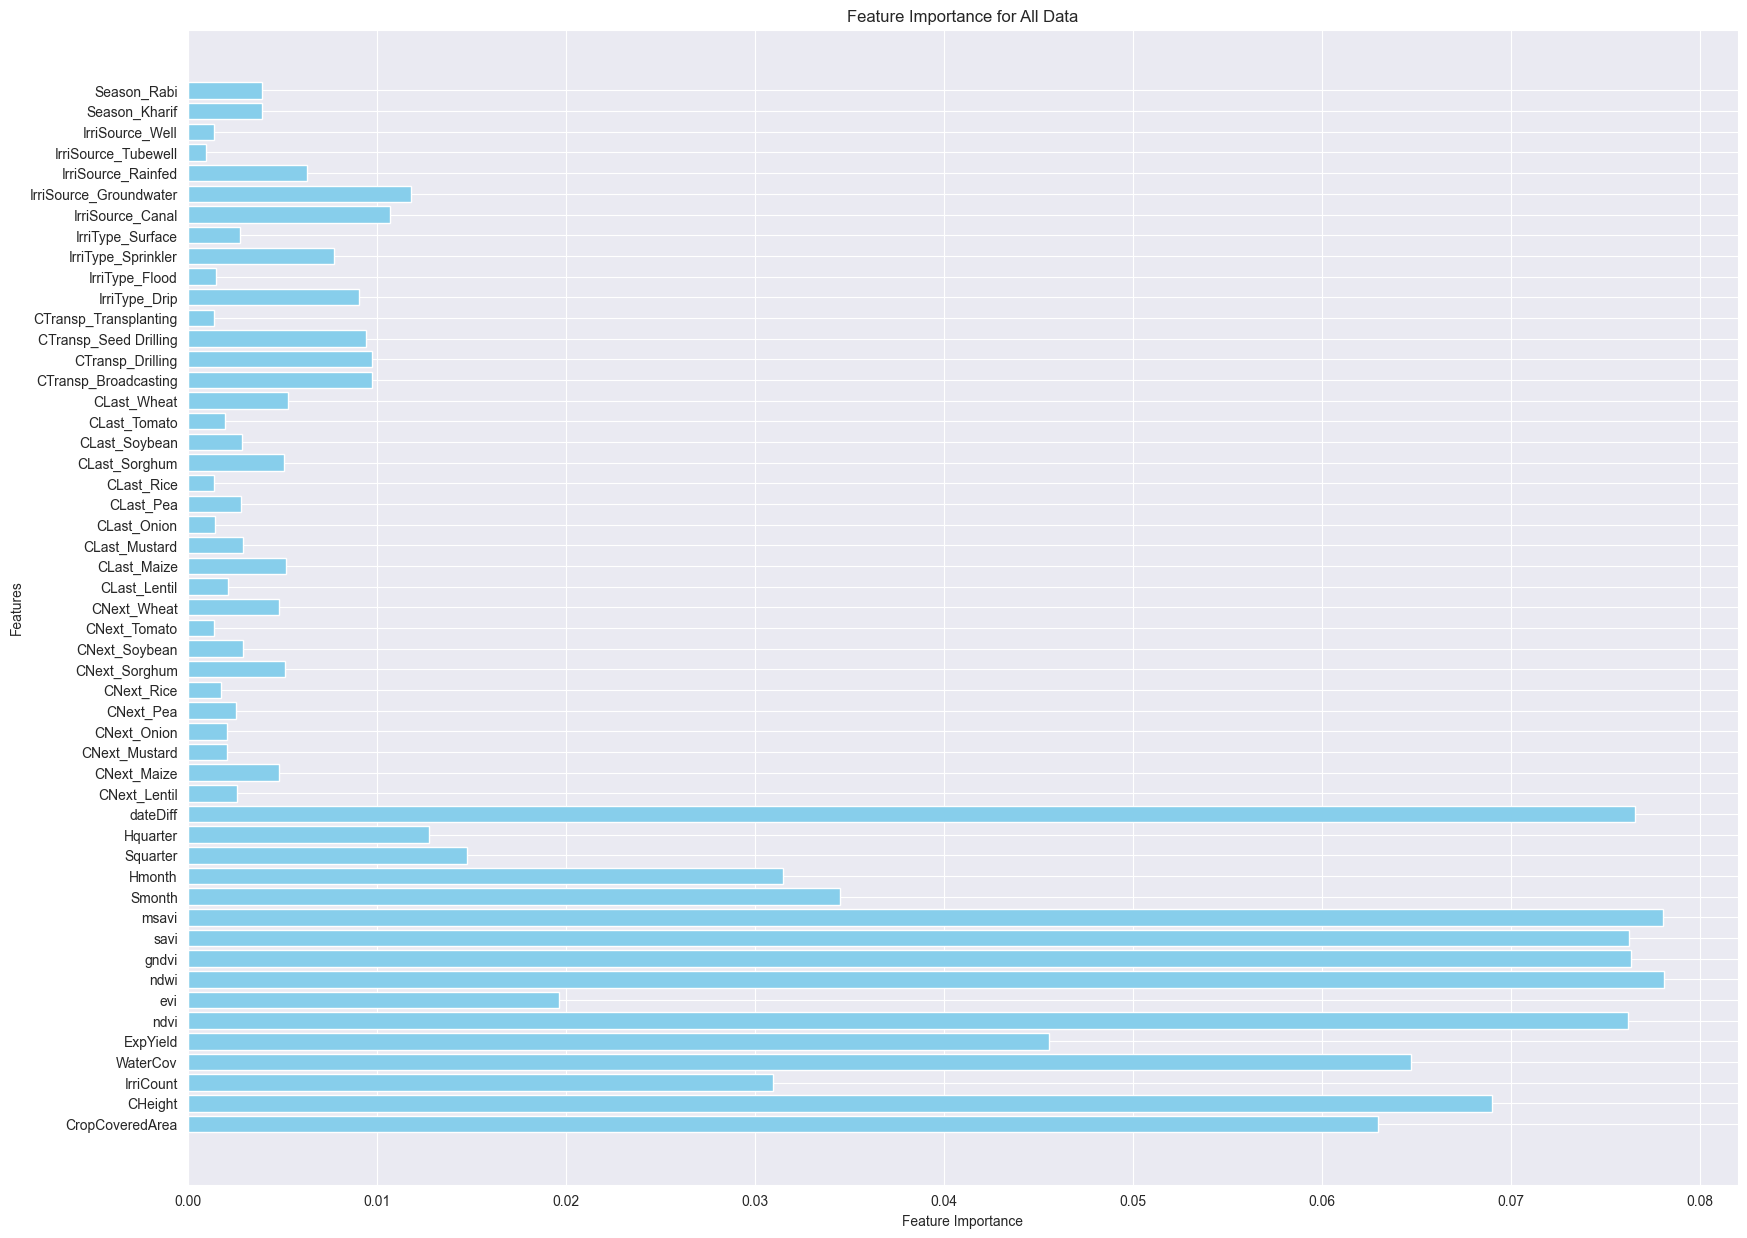

In [26]:
#feature importances for all data

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Prepare the data for the entire dataset
# Encode the target variable 'category'
y = encoder.fit_transform(df1['category'])

# Drop unnecessary columns
df1_processed = df1.drop(columns=['Crop', 'District', 'Sub-District', 'category'], axis=1)

# One-hot encode categorical features
X = pd.get_dummies(df1_processed, columns=df1_processed.select_dtypes(include='object').columns.tolist())

# Train the RandomForestClassifier on the entire dataset
model.fit(X, y)

# Extract feature importances
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances for the entire dataset
plt.figure(figsize=(20, 15))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for All Data")
plt.show()


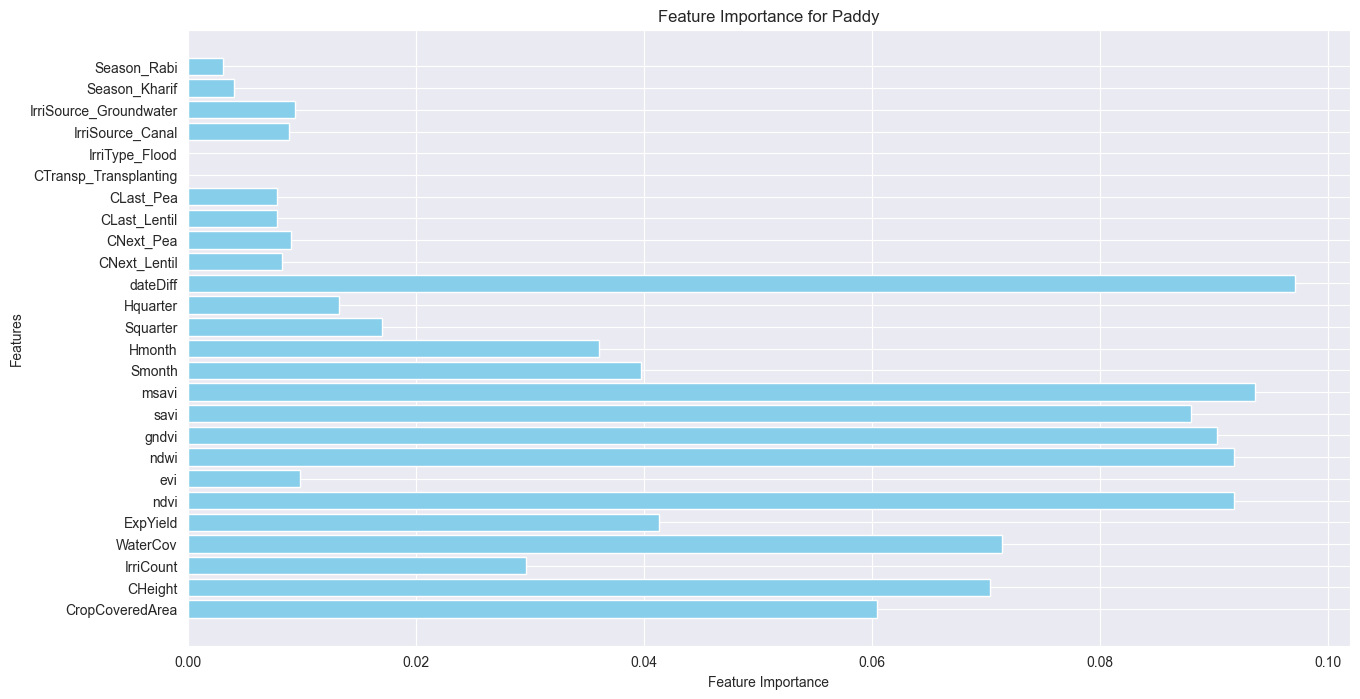

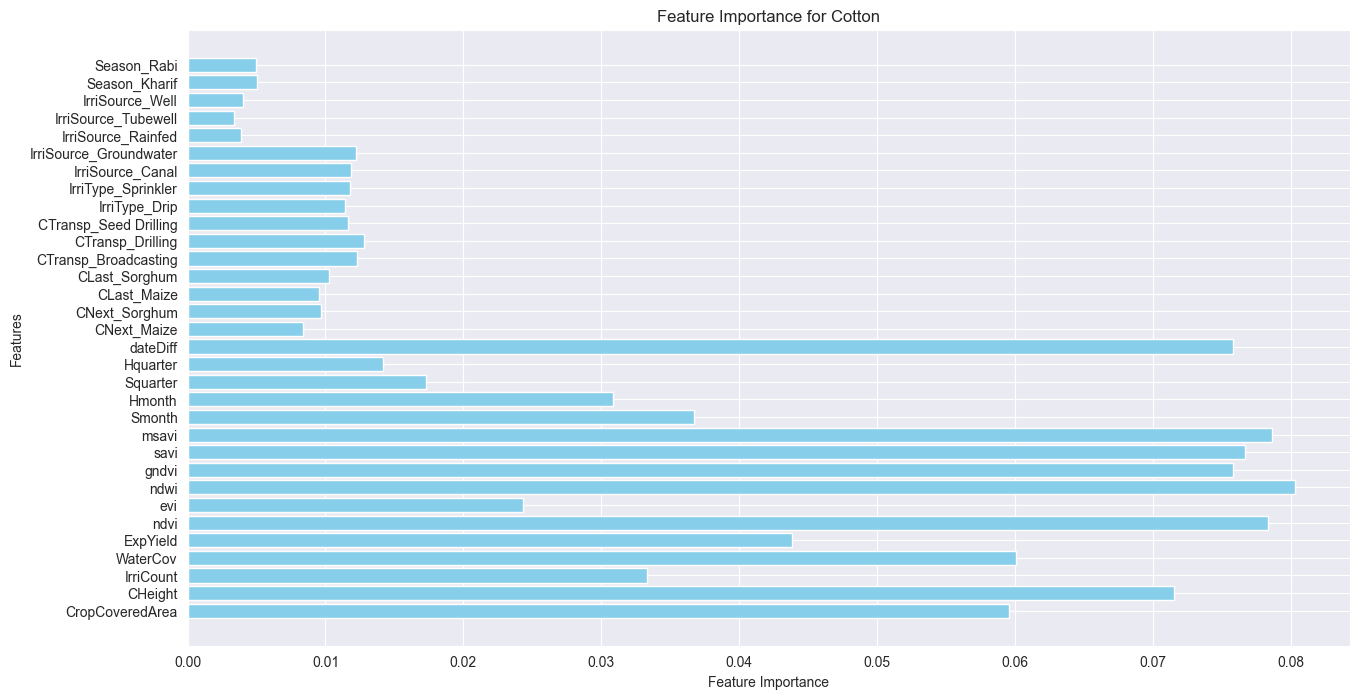

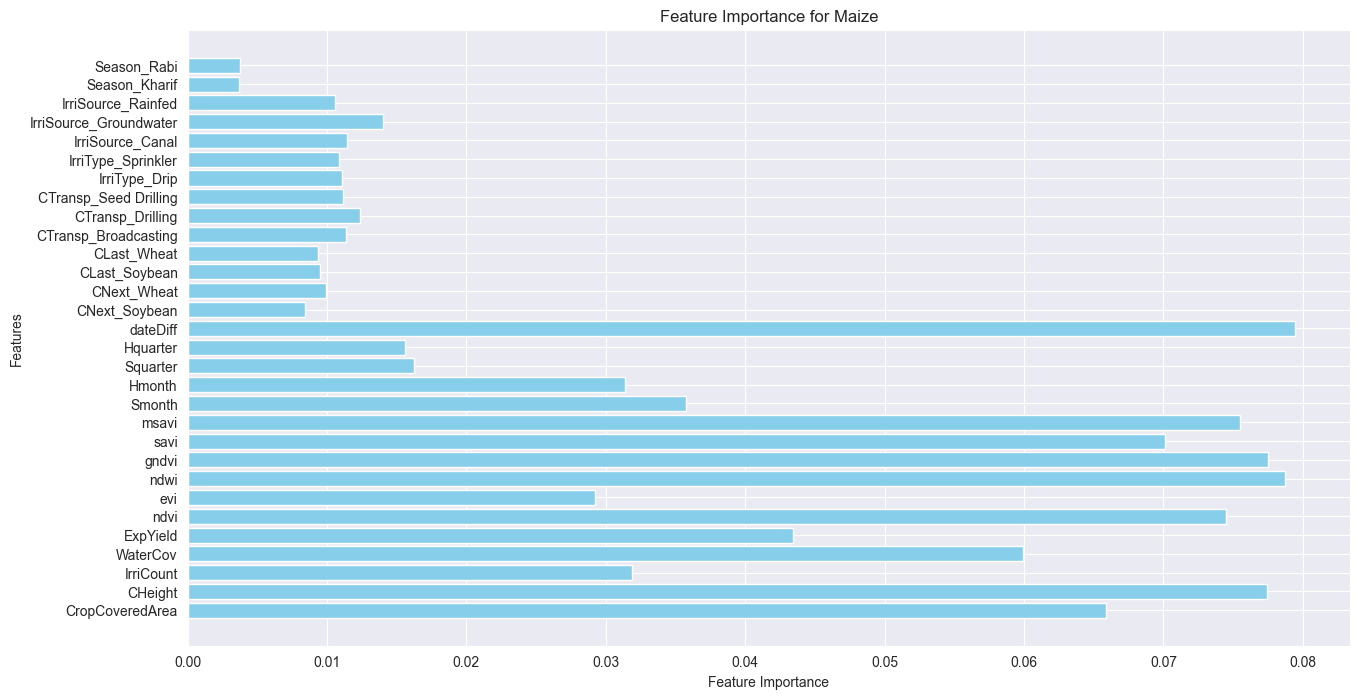

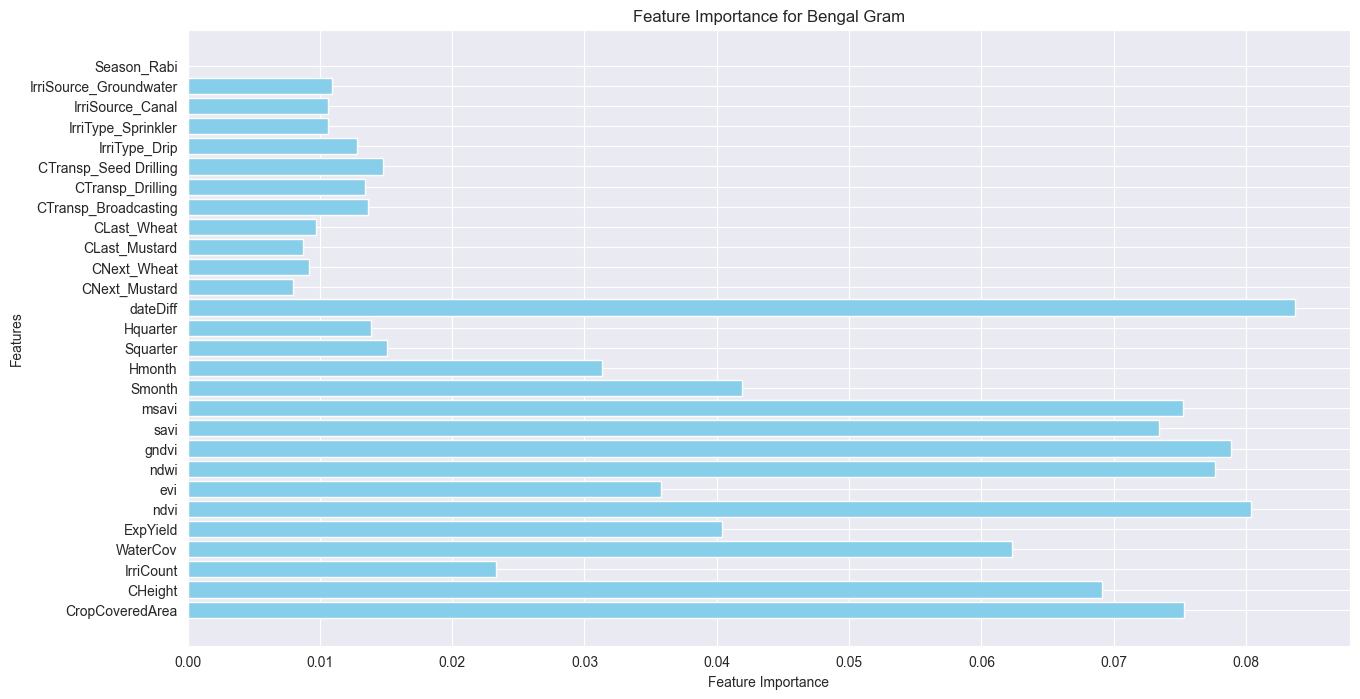

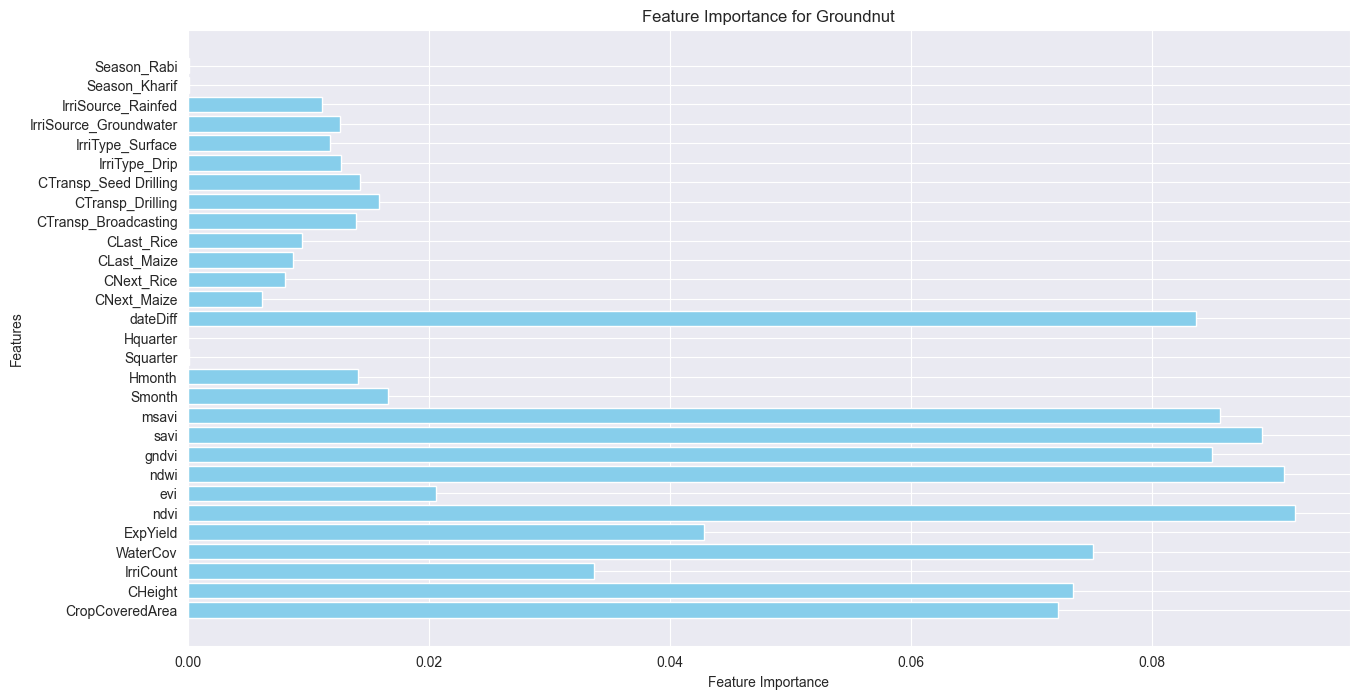

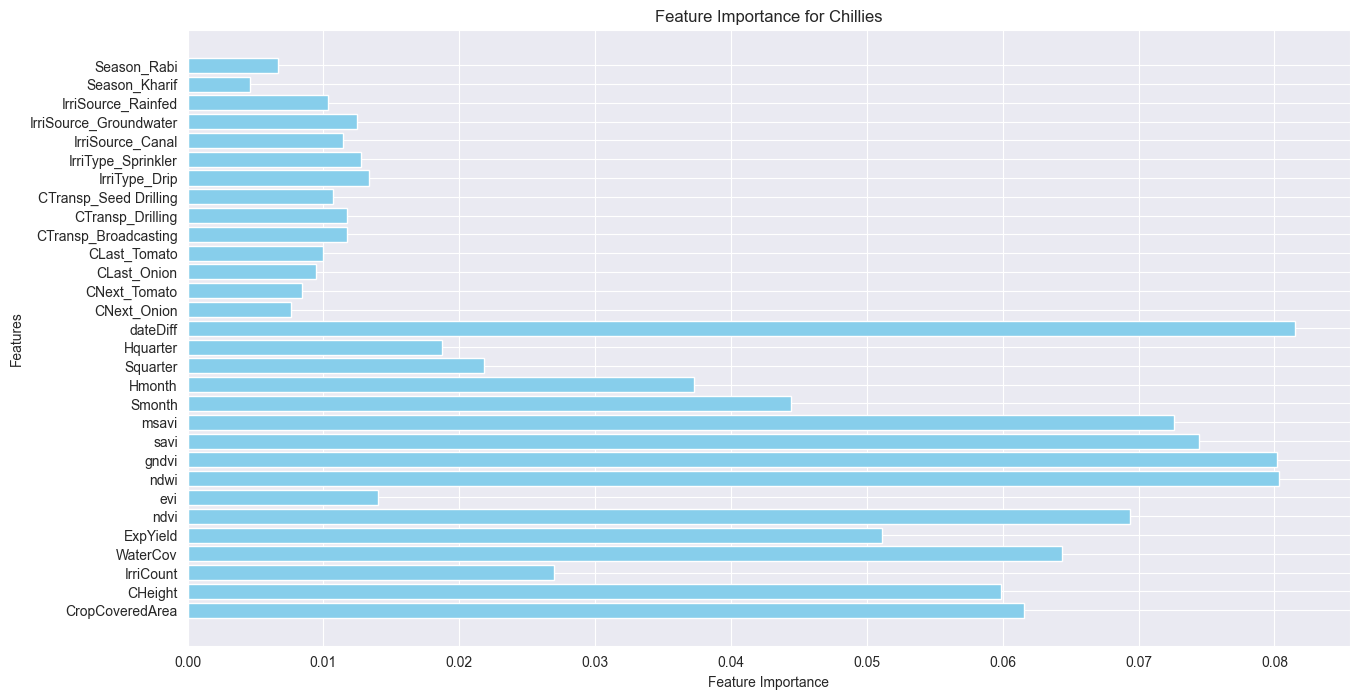

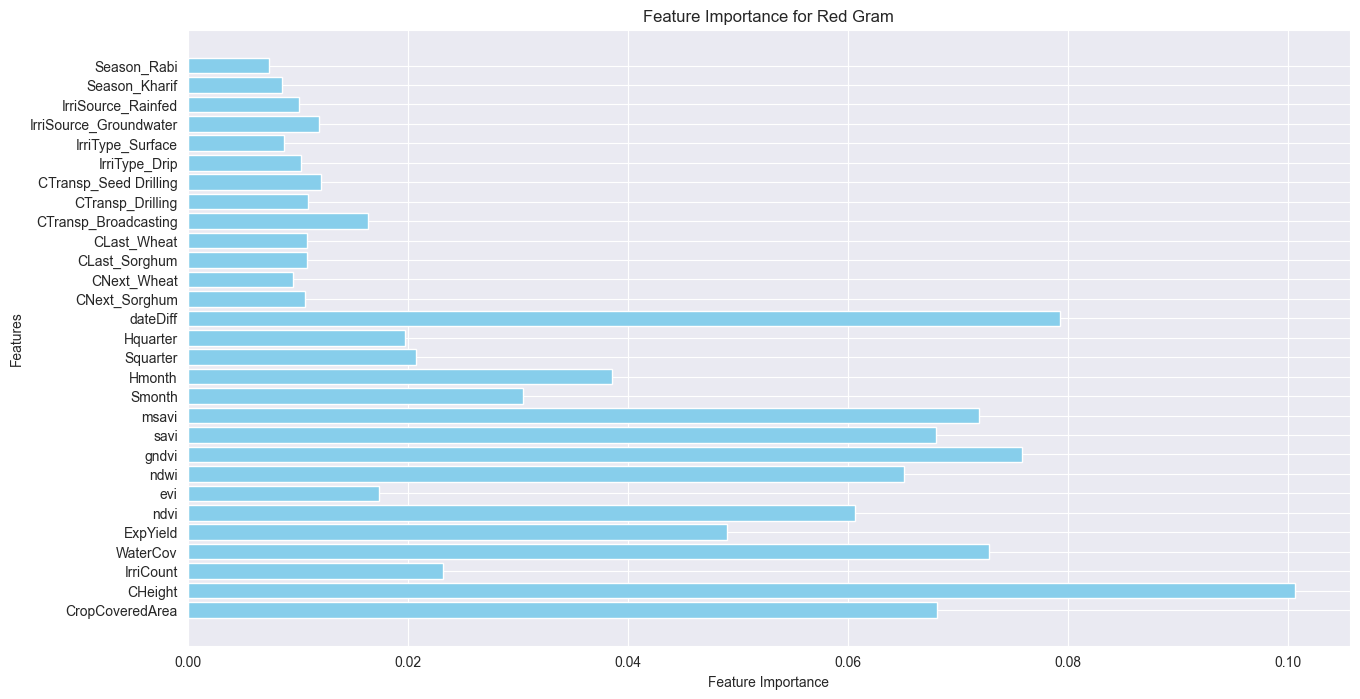

In [23]:
# features importance by crop


crops = df1['Crop'].unique()

model = RandomForestClassifier(random_state=42)

feature_importances_by_crop = {}

for crop in crops:
    crop_data = df1[df1['Crop'] == crop].copy()

    y_crop = encoder.fit_transform(crop_data['category'])
    crop_data.drop(columns=['Crop', 'District', 'Sub-District','category'], axis=1,inplace=True)
    X_crop = pd.get_dummies(crop_data, columns=crop_data.select_dtypes(include='object').columns.tolist())

    model.fit(X_crop, y_crop)

    importances = model.feature_importances_

    feature_importances_by_crop[crop] = (importances, X_crop.columns)

for crop in crops:
    importances, feature_names = feature_importances_by_crop[crop]

    plt.figure(figsize=(15, 8))
    plt.barh(feature_names, importances, color='skyblue')
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title(f"Feature Importance for {crop}")
    plt.show()


In [29]:
onehot_columns = ['CTransp', 'IrriType', 'IrriSource', 'Season','Crop','CNext','CLast']#

df1 = pd.get_dummies(df1, columns=onehot_columns)



KeyError: "None of [Index(['CTransp', 'IrriType', 'IrriSource', 'Season', 'Crop', 'CNext',\n       'CLast'],\n      dtype='object')] are in the [columns]"

In [31]:
df1.drop(columns=['District', 'Sub-District'], axis=1,inplace=True)


In [32]:
df1

,category,CropCoveredArea,CHeight,IrriCount,WaterCov,ExpYield,ndvi,evi,ndwi,gndvi,...,CLast_Lentil,CLast_Maize,CLast_Mustard,CLast_Onion,CLast_Pea,CLast_Rice,CLast_Sorghum,CLast_Soybean,CLast_Tomato,CLast_Wheat
0,Healthy,1.353227,-0.664555,0.329258,1.305630,0.232586,-0.351353,-0.076199,-0.624730,-0.186607,...,True,False,False,False,False,False,False,False,False,False
1,Healthy,0.316806,-0.585072,1.040676,1.611772,-0.122052,-0.299322,-0.076199,0.461376,-0.118854,...,True,False,False,False,False,False,False,False,False,False
2,Healthy,1.007753,0.070660,-0.382160,1.830444,0.764544,-0.288296,-0.076199,-0.018084,-0.097926,...,True,False,False,False,False,False,False,False,False,False
3,Diseased,0.938659,-0.704296,1.040676,1.524303,0.055267,-0.288503,-0.076199,0.082844,-0.081796,...,True,False,False,False,False,False,False,False,False,False
4,Diseased,1.145943,-0.644684,1.040676,1.742975,0.764544,-0.304308,-0.076199,-0.560447,-0.149186,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8770,Healthy,0.040427,-0.128047,-1.093578,0.124799,0.409906,1.437184,-0.076199,-2.538113,-0.312307,...,False,True,False,False,False,False,False,False,False,False
8771,Healthy,0.247712,0.448203,-0.382160,-0.531218,-0.831329,1.843907,-0.076199,-2.287281,-0.313137,...,False,True,False,False,False,False,False,False,False,False
8772,Healthy,-0.650519,-0.426107,-0.382160,0.037330,-0.299371,-0.375865,-0.076199,-0.000415,-0.217557,...,False,False,False,False,False,False,True,False,False,False
8773,Healthy,0.454996,0.269367,-0.382160,-0.225077,0.764544,1.560586,-0.076199,-2.470363,-0.319356,...,False,False,False,False,False,False,True,False,False,False


In [34]:
encoder = LabelEncoder()
df1['category'] = encoder.fit_transform(df1['category'])

In [47]:


X = df1.drop(columns=['category'], axis=1)
y = df1['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify=y)
smote = BorderlineSMOTE(sampling_strategy={0:1500,1:6000,2:1500,3:1500}, random_state=42)


X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

tomek_links = TomekLinks()
X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train_sm, y_train_sm)


print(Counter(y_train_sm))
print((Counter(y_train)))

model= Sequential([
    # Dense(728, activation='relu'),
    Dense(428, activation='relu'),
    Dense(228, activation='relu'),
    # Dropout(0.1),
    Dense(228, activation='relu'),
    # Dropout(0.2),
    Dense(128, activation='relu'),
    # Dropout(0.1),
    Dense(128, activation='relu'),
    # Dropout(0.1),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model

# Define the EarlyStopping callback

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., 'val_loss' or 'val_accuracy')
    mode='min',
    
    patience=100,         # Number of epochs with no improvement to stop training
    restore_best_weights=True,  # Restore weights from the best epoch
    verbose=10           # Print stopping message
)

# Train the model with EarlyStopping
history = model.fit(
    X_train_tomek, y_train_tomek,
    validation_split=0.2,  # Split a portion of training data for validation
    epochs=10,           # Maximum number of epochs
    # callbacks=[early_stopping], # Add the callback
    # class_weight=class_weights
    # batch_size=16

)

# Evaluate the model
# test_loss, test_acc = model_1_0.evaluate(X_test, y_test)
# print(f"Test Accuracy for Classifier 1 (Class 1 vs Class 0): {test_acc}")
#

Counter({1: 6000, 2: 1500, 3: 1500, 0: 1500})
Counter({1: 5839, 2: 435, 0: 426, 3: 380})
Epoch 1/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6681 - loss: 1.2262 - val_accuracy: 0.0000e+00 - val_loss: 2.5707
Epoch 2/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7103 - loss: 0.8570 - val_accuracy: 0.0000e+00 - val_loss: 2.4807
Epoch 3/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7084 - loss: 0.8263 - val_accuracy: 0.0000e+00 - val_loss: 2.6804
Epoch 4/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7663 - loss: 0.7470 - val_accuracy: 0.0020 - val_loss: 2.6732
Epoch 5/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7860 - loss: 0.7052 - val_accuracy: 0.0040 - val_loss: 2.9298
Epoch 6/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7975 - loss: 0.6739 - val_accuracy: 0.0065 - val_loss: 3.5574
Epoch 7/10
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7877 - loss: 0.6937 - val_accuracy: 0.0136 - val_loss: 3.7243
Epo

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


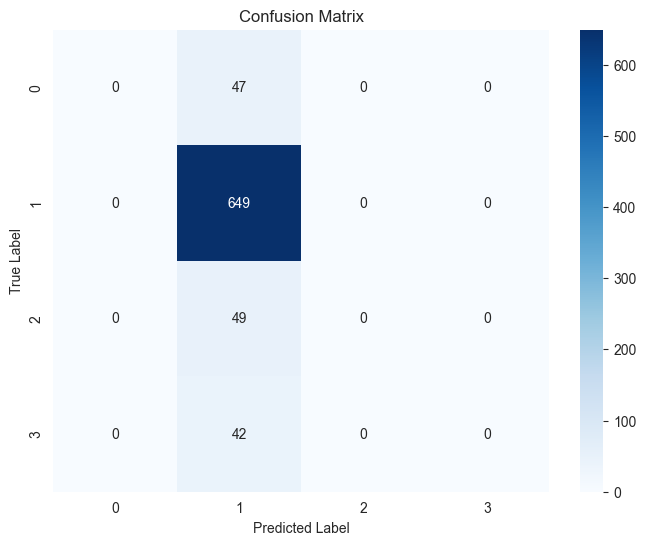

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.82      1.00      0.90       649
           2       0.00      0.00      0.00        49
           3       0.00      0.00      0.00        42

    accuracy                           0.82       787
   macro avg       0.21      0.25      0.23       787
weighted avg       0.68      0.82      0.75       787



C:\Users\khale\ML\PR\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\khale\ML\PR\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\khale\ML\PR\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [48]:
y_pred_proba = model.predict(X_test)  # Probabilities for each class

y_pred = np.argmax(y_pred_proba, axis=1)  # Use argmax to get the class with highest probability

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_test, y_pred))

two minority classes

In [88]:
from imblearn.ensemble import EasyEnsembleClassifier
X = df1[(df1['category'] !=1 )& (df1['category'] != 0)]
y = X['category']
# y = np.where(y == 3,1,y)
X = X.drop(columns=['category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [95]:
smote = BorderlineSMOTE(sampling_strategy={3:3000,2:3000}, random_state=42)


X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

tomek_links = TomekLinks()
X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train_sm, y_train_sm)


In [96]:
easy_ensemble = EasyEnsembleClassifier(n_estimators=50, random_state=4,replacement=True)

# Train the model
easy_ensemble.fit(X_train_tomek, y_train_tomek
                  )

# Make predictions
y_pred = easy_ensemble.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.61      0.72      0.66        97
           3       0.60      0.48      0.54        85

    accuracy                           0.61       182
   macro avg       0.61      0.60      0.60       182
weighted avg       0.61      0.61      0.60       182



binary classification for class Healthy vs all

In [122]:
from imblearn.ensemble import EasyEnsembleClassifier
X = df1.drop(columns=['category'])

y = df1['category']
y = np.where(y == 2,0,y)
y = np.where(y == 3,0,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [123]:
smote = BorderlineSMOTE(sampling_strategy={1:6000,0:2000}, random_state=42)


X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

tomek_links = TomekLinks()
X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train_sm, y_train_sm)


In [125]:
easy_ensemble = EasyEnsembleClassifier(n_estimators=100, random_state=4,replacement=True)

# Train the model
easy_ensemble.fit(X_train_tomek, y_train_tomek
                  )

# Make predictions
y_pred = easy_ensemble.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.19      0.18       276
           1       0.82      0.80      0.81      1298

    accuracy                           0.69      1574
   macro avg       0.49      0.49      0.49      1574
weighted avg       0.71      0.69      0.70      1574



In [119]:
from sklearn.model_selection import GridSearchCV

# Data preprocessing
X = df1.drop(columns=['category'], axis=1)
y = df1['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

# Apply BorderlineSMOTE and Tomek Links
smote = BorderlineSMOTE(sampling_strategy={1: 6000, 0: 2500, 2:2500, 3: 2500}, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

tomek_links = TomekLinks()
X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train_sm, y_train_sm)

print("Class distribution before resampling:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_sm))
print("Class distribution after Tomek Links:", Counter(y_train_tomek))

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'learning_rate': [0.01, 0.03, 0.1, 0.3],
    'max_depth': [3, 4, 5, 6],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize XGBoost classifier
xgb = XGBClassifier(objective='multi:softmax', random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',  # You can use 'roc_auc_ovr' for multi-class ROC-AUC
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all processors
)

# Fit the model
print("Starting GridSearchCV...")
grid_search.fit(X_train_tomek, y_train_tomek)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Class distribution before resampling: Counter({1: 5190, 2: 387, 0: 378, 3: 338})
Class distribution after SMOTE: Counter({1: 6000, 3: 2500, 2: 2500, 0: 2500})
Class distribution after Tomek Links: Counter({1: 5789, 0: 2500, 2: 2432, 3: 2430})
Starting GridSearchCV...
Fitting 3 folds for each of 6912 candidates, totalling 20736 fits


KeyboardInterrupt: 

In [117]:

from xgboost import XGBClassifier

X = df1.drop(columns=['category'], axis=1)
y = df1['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4,stratify=y)
smote = BorderlineSMOTE(sampling_strategy='auto', random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

tomek_links = TomekLinks()
X_train_tomek, y_train_tomek = tomek_links.fit_resample(X_train_sm, y_train_sm)
# Check class distribution after Tomek Links

print(Counter(y_train))
print(Counter(y_train_sm))
print(Counter(y_train_tomek))

model = XGBClassifier(
    objective='multi:softmax',
    # random_state=42,
    n_estimators=1000,
    learning_rate=0.01,
    # gamma=7,
    max_depth=4,
    # min_child_weight=10,
    # eta=2,
    
    # subsample=0.8,
    # colsample_bytree=0.1,
    # subsample=0.8,
    # eval_metric='auc',
    
)
# Train the model
model.fit(X_train_tomek, y_train_tomek)

# Predict
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Evaluate
print(classification_report(y_test, y_pred))


Counter({1: 5839, 2: 435, 0: 426, 3: 380})
Counter({1: 5839, 2: 5839, 0: 5839, 3: 5839})
Counter({0: 5839, 2: 5774, 3: 5767, 1: 5623})
              precision    recall  f1-score   support

           0       0.07      0.04      0.05        47
           1       0.82      0.95      0.88       649
           2       0.00      0.00      0.00        49
           3       0.00      0.00      0.00        42

    accuracy                           0.79       787
   macro avg       0.22      0.25      0.23       787
weighted avg       0.68      0.79      0.73       787

